Meta Data Extraction,
Named entity Recognition,
Rent Agreement Parsing,
Rent Agreement Meta Data Extraction,
NLP,
Spacy NER

In [1]:
#My library Templete
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import spacy
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import gc
from tensorflow.keras import regularizers
from sklearn.preprocessing import minmax_scale
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve as learning_cv
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import scikitplot as skplt   
from sklearn.metrics import classification_report   
import re
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns
from sklearn import metrics
import os
import json
from sklearn.preprocessing import minmax_scale
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve as learning_cv
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import scikitplot as skplt   
from sklearn.metrics import classification_report   
import random
import logging
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from spacy.gold import GoldParse
from spacy.scorer import Scorer
from sklearn.metrics import accuracy_score

In [2]:
#install docx lib to read docx
# !pip install python-docx

In [2]:
import docx

In [3]:
train_labels=pd.read_csv('TrainingTestSet.csv')
val_labels=pd.read_csv('ValidationSet.csv')
train_text_dir='Training_data/Training_data/'
val_text_dir='Validation_data/Validation_data/'

In [178]:
list1 = ["ar1","ar2","vr1","vr2","ab1","ab2"]

In [197]:
[i for i in list1 if "b" in i]

['ab1', 'ab2']

In [204]:
x =lambda a : a**2

In [205]:
x(52)

2704

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def myfunc(self):
        print("Hello my name is " + self.name)


p1 = Person("Sam", 23)
p1.myfunc()

In [4]:
import re
def clean(text):
    text=text.replace('/','.')
    text=text.replace('\\','.')
    text=text.replace('. ','.')
    text=text.replace(', ','')
    text=text.replace(',','')
    text=text.replace('-','.')
    text=text.replace('/','.')
    text=text.replace('. ','.')
    #text=text.lower()
    return(text)

In [25]:
for i in os.listdir('Training_data/'):
    print(i)

343492954-Rent-Agreement-3E.pdf.docx
54945838-Rental-Agreement.pdf.docx
288024755-Rental-Agreement-1.pdf.docx
267005869-Rental-Tenant.pdf.docx
62126501-Rental-Agreement.pdf.docx
50070534-RENTAL-AGREEMENT (1).pdf.docx
251798216-Rental-Agreement-Format1.pdf.docx
116950326-December-2012-Rental-Agreement.pdf.docx
54770958-Rental-Agreement.pdf.docx
203615996-Rental-Agreement-Format.pdf.docx
248636461-Rental-Agreement.pdf.docx
195231682-This-RENTAL-AGREEMENT-is-Made-and-Executed-on-24th-Day-of-September.pdf.docx
269760124-97646-41223-Rental-Agreement.pdf.docx
249104436-House-Rental-Agreement.pdf.docx
36199312-Rental-Agreement.pdf.docx
99699504-Rental-Agreement-English-Model.pdf.docx
323828497-Rental-Agreement-Micky.pdf.docx
170499354-Anand-Nagar-Agreement.pdf.docx
6683127-House-Rental-Contract-GERALDINE-GALINATO-v2-Page-1.pdf.docx
56736420-Rental-Agreement.pdf.docx
63793679-Rental-Agreement.pdf.docx
77112358-Jaggu-Rental-Agreemnt.pdf.docx
100999172-House-Rental-Agreement.pdf.docx
392810415-R

In [35]:
# prepair data for training
data = []
data_index = list(train_labels.columns)
count = 0
new_data = []
ph_1,ph_2,ph_3,ph_4,ph_5,ph_6 = [],[],[],[],[],[]
for i in os.listdir('Training_data/'):
    doc = docx.Document('Training_data/'+i)  # Creating word reader object.
    paragraph = doc.paragraphs
    st = ""
    for j in paragraph:
        st += clean(str(j.text))+" "
    data.append(st)
    temp = train_labels.loc[train_labels['File Name'] == i[:-9]]

    entities = []
    for col in data_index[1:]:
        query = str(tuple(temp[col])[0])

        if(col == 'Aggrement Start Date' or col == 'Aggrement End Date'):
            if(st.find(query) != -1):
                entities.append(
                    [st.find(query), st.find(query)+len(query), col])
                continue
            if(type(tuple(temp[col])[0]) == type(8.0) and tuple(temp[col])[0] >= 0):
                query = str(int(tuple(temp[col])[0]))
            if(st.find(query) != -1 or st.lower().find(query.lower()) != -1):
                entities.append(
                    [st.find(query), st.find(query)+len(query), col])
            print(i, col, query, type(tuple(temp[col])[0]))
            ph_1.append(i)
            ph_2.append(col)
            ph_3.append(query)
        else:
            print(i, col, query, type(tuple(temp[col])[0]))
            ph_4.append(i)
            ph_5.append(col)
            ph_6.append(query)
            count += 1
    new_data.append((st, {'entities': entities}))
print(count)

343492954-Rent-Agreement-3E.pdf.docx Aggrement Value 11500.0 <class 'float'>
343492954-Rent-Agreement-3E.pdf.docx Aggrement End Date 31.03.2015 <class 'str'>
343492954-Rent-Agreement-3E.pdf.docx Renewal Notice (Days) 30.0 <class 'float'>
343492954-Rent-Agreement-3E.pdf.docx Party One ANAND RAJ <class 'str'>
343492954-Rent-Agreement-3E.pdf.docx Party Two  BEENA PURATHAYIL MADHAVAN <class 'str'>
54945838-Rental-Agreement.pdf.docx Aggrement Value 5500.0 <class 'float'>
54945838-Rental-Agreement.pdf.docx Aggrement Start Date 21.04.2011 <class 'str'>
54945838-Rental-Agreement.pdf.docx Aggrement End Date 19.02.2012 <class 'str'>
54945838-Rental-Agreement.pdf.docx Renewal Notice (Days) 60.0 <class 'float'>
54945838-Rental-Agreement.pdf.docx Party One Asha Ramesh & Ramesh K.N <class 'str'>
54945838-Rental-Agreement.pdf.docx Party Two Sadasivuni Deepthi & Sadasivuni Kiran <class 'str'>
288024755-Rental-Agreement-1.pdf.docx Aggrement Value 5000.0 <class 'float'>
288024755-Rental-Agreement-1.pdf.

77112358-Jaggu-Rental-Agreemnt.pdf.docx Aggrement Value 4000.0 <class 'float'>
77112358-Jaggu-Rental-Agreemnt.pdf.docx Aggrement End Date 09.04.2010 <class 'str'>
77112358-Jaggu-Rental-Agreemnt.pdf.docx Renewal Notice (Days) 90.0 <class 'float'>
77112358-Jaggu-Rental-Agreemnt.pdf.docx Party One E.Anwar  <class 'str'>
77112358-Jaggu-Rental-Agreemnt.pdf.docx Party Two Mohammed Ishaq  <class 'str'>
100999172-House-Rental-Agreement.pdf.docx Aggrement Value 14500.0 <class 'float'>
100999172-House-Rental-Agreement.pdf.docx Aggrement Start Date 10.01.2011 <class 'str'>
100999172-House-Rental-Agreement.pdf.docx Aggrement End Date 09.01.2012 <class 'str'>
100999172-House-Rental-Agreement.pdf.docx Renewal Notice (Days) 90.0 <class 'float'>
100999172-House-Rental-Agreement.pdf.docx Party One Namashivayam <class 'str'>
100999172-House-Rental-Agreement.pdf.docx Party Two Thenmalar <class 'str'>
392810415-RENT-AGREEMENT.pdf.docx Aggrement Value 23000.0 <class 'float'>
392810415-RENT-AGREEMENT.pdf.do

In [144]:
# pd.DataFrame(ph_1,ph_2).reset_index()
pop_df_1 = pd.DataFrame(
    {'ph1': ph_1,
     'ph2': ph_2,
     'ph3': ph_3
     })

In [145]:
pop_df_2 = pd.DataFrame(
    {'ph1': ph_4,
     'ph2': ph_5,
     'ph3': ph_6
     })

In [147]:
pop_df_1 = pop_df_1.pivot(index='ph1',columns="ph2",values="ph3").reset_index()

In [149]:
pop_df_2 = pop_df_2.pivot(index='ph1',columns="ph2",values="ph3").reset_index()

In [177]:
pd.merge(pop_df_1, pop_df_2, left_on='ph1', right_on='ph1', how='outer')

ph2,ph1,Aggrement End Date,Aggrement Start Date,Aggrement Value,Party One,Party Two,Renewal Notice (Days)
0,100999172-House-Rental-Agreement.pdf.docx,09.01.2012,10.01.2011,14500.0,Namashivayam,Thenmalar,90.0
1,136441742-Rental-Agreement-Format.pdf.docx,10.03.2013,NaN,15000.0,P. Raja. Sekhar,Venkata Bhyrava Murthy Mutnuri,60.0
2,142106117-Rental-Agreement.pdf.docx,31.02.2012,01.03.2011,7200.0,k.Sarguneswaran,R.Mathankumar,30.0
3,170499354-Anand-Nagar-Agreement.pdf.docx,04.04.2012,05.04.2011,8000.0,PADMAVATI,SANGHAMITRA PARIDA,30.0
4,18325926-Rental-Agreement-1.pdf.docx,31.11.2009,05.12.2008,4000.0,MR.K.Kuttan,P.M. Narayana Namboodri,90.0
5,195231682-This-RENTAL-AGREEMENT-is-Made-and-Ex...,05.03.2014,06.04.2013,13000.0,C.BHAGYAMMA,JP INTERIO,30.0
6,203615996-Rental-Agreement-Format.pdf.docx,31.01.2009,01.02.2008,3500.0,T.RADHA KRISHNAN,ABHIJIT BHARADWAJ,30.0
7,216973836-Rental-Agreement-Sample.pdf.docx,23.03.2014,23.03.2013,15000.0,Kamal,V.Arun Kumar,60.0
8,248636461-Rental-Agreement.pdf.docx,31.07.2015,01.08.2014,2500.0,M. Geetha,Siruvani Traders Private Limited,120.0
9,249104436-House-Rental-Agreement.pdf.docx,31.06.2015,01.07.2014,450.0,SUHAIMI BIN AG. AMAN AND NOOR AZEENAH BINTI MI...,MOHD KHAIRUN BIN ZAKARIA,30.0


In [6]:
TRAIN_DATA=new_data
#load model
nlp = spacy.blank('en')
if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
#adding labels
for _, labels in TRAIN_DATA:
     for ent in labels.get('entities'):
        ner.add_label(ent[2])

/opt/anaconda3/lib/python3.8/site-packages/spacy/language.py:635: UserWarning: [W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.
  proc.begin_training(
/opt/anaconda3/lib/python3.8/site-packages/spacy/language.py:635: UserWarning: [W034] Please install the package spacy-lookups-data in order to include the default lexeme normalization table for the language 'en'.
  proc.begin_training(


iteration : 0  Start


/opt/anaconda3/lib/python3.8/site-packages/spacy/language.py:482: UserWarning: [W030] Some entities could not be aligned in the text "LEASE AGREEMENT This DEED OF RENTAL AGREEMENT EXEC..." with entities "[[851, 862, 'Aggrement Start Date'], [921, 931, 'A...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.
  gold = GoldParse(doc, **gold)
/opt/anaconda3/lib/python3.8/site-packages/spacy/language.py:482: UserWarning: [W030] Some entities could not be aligned in the text "RENTAL AGREEMENT This Rental Agreement made and ex..." with entities "[[113, 123, 'Aggrement Start Date']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.
  gold = GoldParse(doc, **gold)
/opt/anaconda3/lib/python3.8/site-packages/spacy/language.py:482: UserWarning: [W030] Some enti

Loss in iteration : 0 loss :  4293.240681864686
iteration : 1  Start
Loss in iteration : 1 loss :  19.02742949679535
iteration : 2  Start
Loss in iteration : 2 loss :  73.49943133630674
iteration : 3  Start
Loss in iteration : 3 loss :  9.97388516407139
iteration : 4  Start
Loss in iteration : 4 loss :  9.185096593684877
iteration : 5  Start
Loss in iteration : 5 loss :  7.3714049577074405
iteration : 6  Start
Loss in iteration : 6 loss :  4.002452302805486
iteration : 7  Start
Loss in iteration : 7 loss :  4.668697047331091
iteration : 8  Start
Loss in iteration : 8 loss :  1.275089236040789
iteration : 9  Start
Loss in iteration : 9 loss :  1.5465669215729554
iteration : 10  Start
Loss in iteration : 10 loss :  2.2190604245771106
iteration : 11  Start
Loss in iteration : 11 loss :  0.9066197947755791
iteration : 12  Start
Loss in iteration : 12 loss :  2.0836787078829397
iteration : 13  Start
Loss in iteration : 13 loss :  0.5354966749221851
iteration : 14  Start
Loss in iteration : 

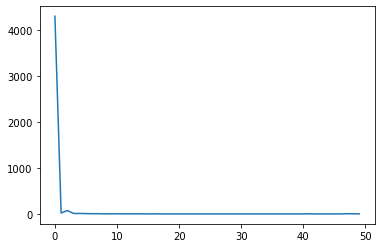

In [7]:
#adding task to piplines
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
count=0
loss_val=[]
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
    for i in range(50):
        print("iteration :" ,i," Start")
        random.shuffle(TRAIN_DATA)
        losses = {}
        #start training
        for text, annotations in TRAIN_DATA:
            try:                
                nlp.update(
                    [text],  # batch of texts
                    [annotations],  # batch of annotations
                    drop=0.35,  # dropout - make it harder to memorise data
                    sgd=optimizer,
                    # callable to update weights
                    losses=losses)
            except:
                pass
                count=count+1
        loss_val.append(list(losses.values())[0])
        print("Loss in iteration :",i,"loss : ",list(losses.values())[0])
#plot loss
plt.plot(loss_val)

In [8]:
#load validation data 
data=[]
data_index=list(train_labels.columns)
count=0
new_data=[]
for i in os.listdir('Validation_Data/'):
    doc = docx.Document('Validation_Data/'+i)  # Creating word reader object.
    paragraph=doc.paragraphs
    st=""
    for j in paragraph:
        st+=clean(str(j.text))+" "
    data.append(st)
    temp=val_labels.loc[val_labels['File Name'] == i[:-9]]
    #convert in proper format
    entities=[]
    for col in data_index[1:]:
        query=str(tuple(temp[col])[0])

        if(col=='Aggrement Start Date' or col=='Aggrement End Date'):
            if(st.find(query)!=-1):
                entities.append([st.find(query),st.find(query)+len(query),col])
                continue        
        if(type(tuple(temp[col])[0])==type(8.0) and tuple(temp[col])[0]>=0): 
                query=str(int(tuple(temp[col])[0]))      
        if(st.find(query)!=-1 or st.lower().find(query.lower())!=-1):
                entities.append([st.find(query),st.find(query)+len(query),col])

        else:
            print(i,col,query,type(tuple(temp[col])[0]))
            count+=1
    new_data.append((st,{'entities':entities}))

24158401-Rental-Agreement.pdf.docx Aggrement Start Date 01.04.2008 <class 'str'>
24158401-Rental-Agreement.pdf.docx Aggrement End Date 31.03.2009 <class 'str'>
228094620-Rental-Agreement.pdf.docx Aggrement Start Date 07.07.2013 <class 'str'>
228094620-Rental-Agreement.pdf.docx Aggrement End Date 06.06.2014 <class 'str'>
228094620-Rental-Agreement.pdf.docx Party One  KAPIL MEHROTRA  <class 'str'>
195231682-This-RENTAL-AGREEMENT-is-Made-and-Executed-on-24th-Day-of-September.pdf.docx Aggrement Start Date 06.04.2013 <class 'str'>
195231682-This-RENTAL-AGREEMENT-is-Made-and-Executed-on-24th-Day-of-September.pdf.docx Aggrement End Date 05.03.2014 <class 'str'>
63793679-Rental-Agreement.pdf.docx Aggrement End Date 31.08.2012 <class 'str'>
239419594-Rental-Agreement.pdf.docx Aggrement Start Date 07.07.2014 <class 'str'>
239419594-Rental-Agreement.pdf.docx Aggrement End Date 06.06.2015 <class 'str'>
239419594-Rental-Agreement.pdf.docx Party One Abraham <class 'str'>
239419594-Rental-Agreement.p

In [12]:
new_data.

[('                 This rental agreement is made and executed on this 1st day of April 2008 (1.04.08) by and between Sri Hanumaiah No 121st Floor6th CrossBalajinagar DRC PostBangalore 560029 Hereinafter referred to as the owner: Lesser of the one part and in favour of: Sri Vishal Bhardwaj S.O Charnel Singh Village Pandol Road PO and Tehsil Baijnath Dist: Kangra (H.P.) Himachal Pradesh 176125 Hereinafter referred to as the Tenant: Lessee of the other part: Where as the terms both the lesser and the Lessee shall mean and include their respective heirs executors legal representatives administrators and assigns. Whereas the lesser herein is the absolute owner of the schedule premises situated at No 12Ground Floor6th CrossBalajinagarDRC Postand Bangalore 560029.Whereas the lessee approached with the lesser let out the schedule premises and the lesser has agreed to let out the schedule premises under the following terms and conditions The lesser agrees to let out the above premises to the l

In [9]:
#test the model and evaluate it

In [10]:
#print predicted values
examples =new_data
c=0    
for text,annot in examples:
        doc_to_test=nlp(text)
        d={}
        for ent in doc_to_test.ents:
            d[ent.label_]=[]
        for ent in doc_to_test.ents:
            d[ent.label_].append(ent.text)
        print(d)
        c+=1


{}
{}
{}
{'Aggrement Start Date': ['01.09.2011']}
{}
{}
{}
{}
